# MRCV4 DSP Test Vector Generator/Evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg

In [2]:
vec_path = 'C:/Users/hansg/Documents/MIT/Hanlab/MR-Core/hdl/mrr_core/mrr_core.srcs/sim_1/new/'
vec_file = 'adcvec.mem'

def write_bin_file_adc(vec_a, vec_b):
    with open(vec_path + vec_file, 'wb') as f:
        for i in range(len(vec_a)):
            f.write(int(vec_a[i]).to_bytes(2, 'big', signed=True ))
            f.write(int(vec_b[i]).to_bytes(2, 'big', signed=True ))
    f.close()
    
def write_bin_file_raw(vector):
    with open(vec_path + vec_file, 'wb') as f:
        for item in vector:          
            f.write(int(item).to_bytes(4, 'big'))
    f.close()
    
def read_bin_file(filename):
    with open(vec_path + filename, 'rb') as f:
        byte_array = bytearray(f.read())
    f.close()
    rsarr = np.reshape(byte_array, (-1,2))
    return np.array([int.from_bytes(rsarr[i], "little") for i in range(len(rsarr))])

## Create a simulated FID at 120MSps

<IPython.core.display.Javascript object>


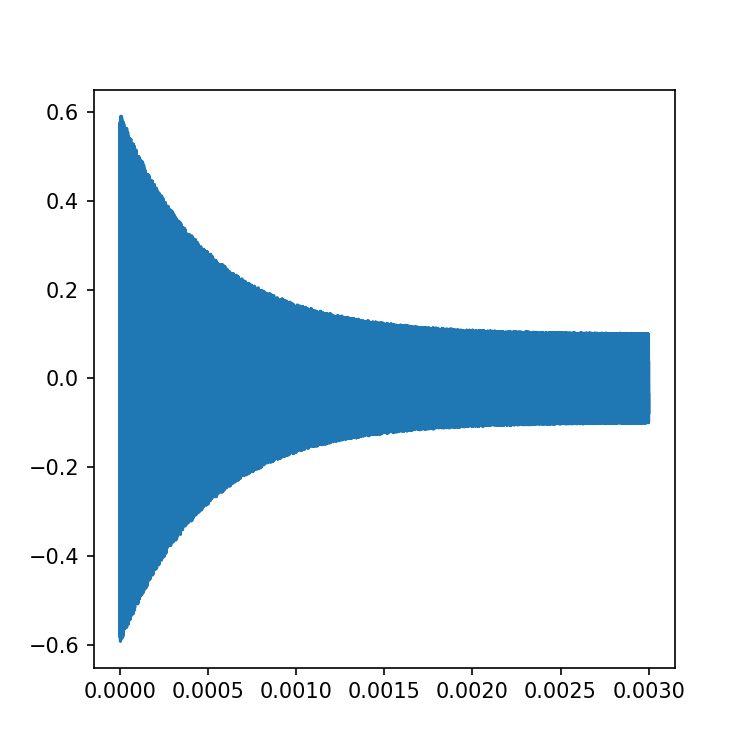

In [3]:
%matplotlib notebook
fs = 120e6
fl = 8.13e6
noise_amp = 0.2
t = np.arange(0,3e-3,1/fs)
fid = 0.5*np.exp(-2000*t)*np.cos(2*np.pi*fl*t) + (noise_amp*np.random.random_sample(len(t)) - noise_amp/2)
fidfig = plt.figure(figsize=(5,5))
plt.plot(t, fid)
plt.show()

In [4]:
fid_ints = (2**13*fid).astype('int16')
write_bin_file_adc(fid_ints, np.zeros(len(fid_ints)).astype(np.int16))

## Cosim

In [5]:
f_lo = 8.14e6
vfo = np.exp(-1j*2*np.pi*f_lo*t)*2**13
data_if = (vfo*fid_ints)

<IPython.core.display.Javascript object>


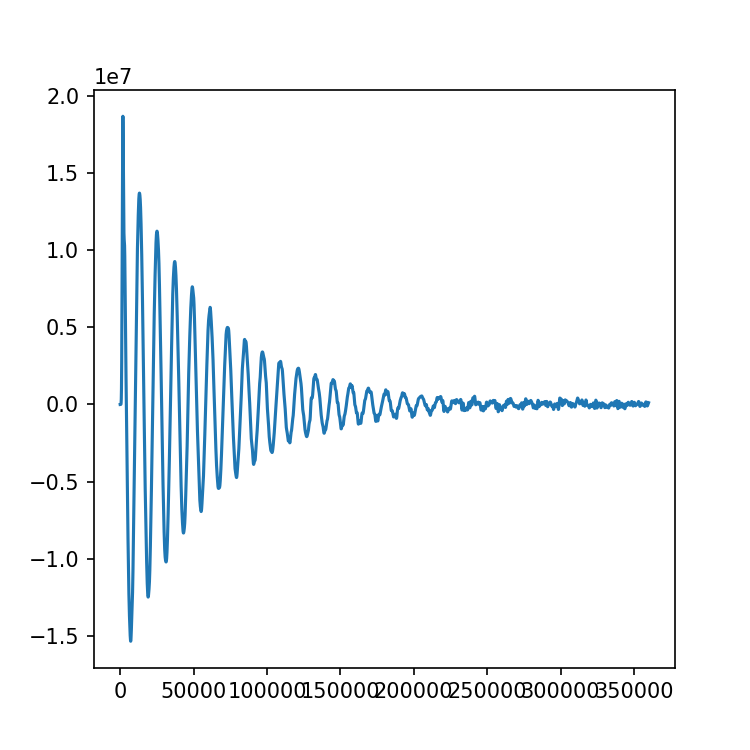

C:\Users\hansg\miniconda3\envs\radioconda\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [6]:
iffig = plt.figure(figsize = (5,5))
sos = sg.butter(10,100000,fs=fs, output='sos')
zi = sg.sosfilt_zi(sos)*fid[0]
y, zo = sg.sosfilt(sos, data_if, zi=zi)
# plt.plot(vfo[:1000])
# plt.plot(fid[:1000])
plt.plot(y)
plt.show()

## Filter Design

<IPython.core.display.Javascript object>


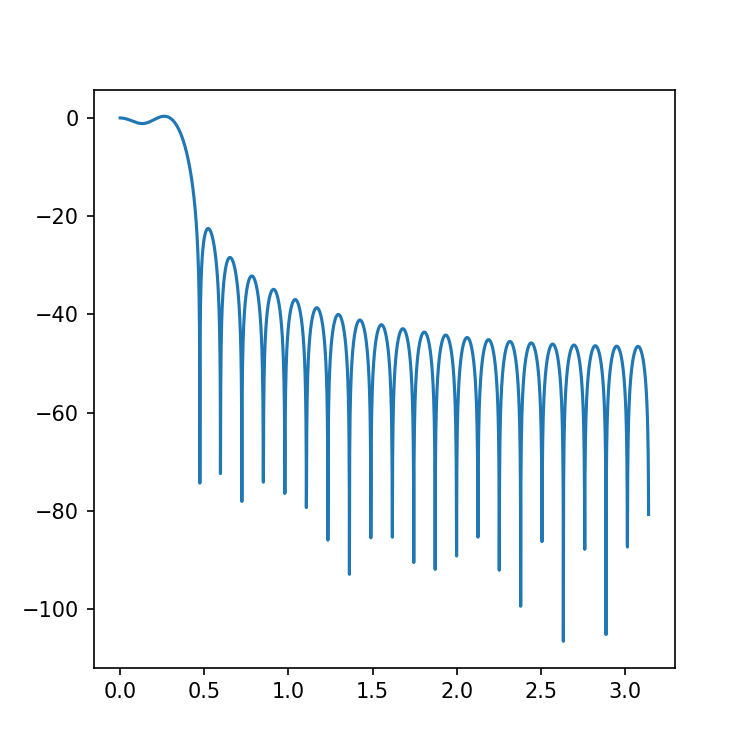

In [104]:
filt1 = sg.firwin(5, 0.125, window='boxcar', pass_zero='lowpass')
f,h = sg.freqz(filt1, worN=4000)
# plot_freq_response(f,h)
firfig = plt.figure(figsize=(5,5))
plt.plot(f,20 * np.log10(np.abs(h)))
plt.show()

<IPython.core.display.Javascript object>


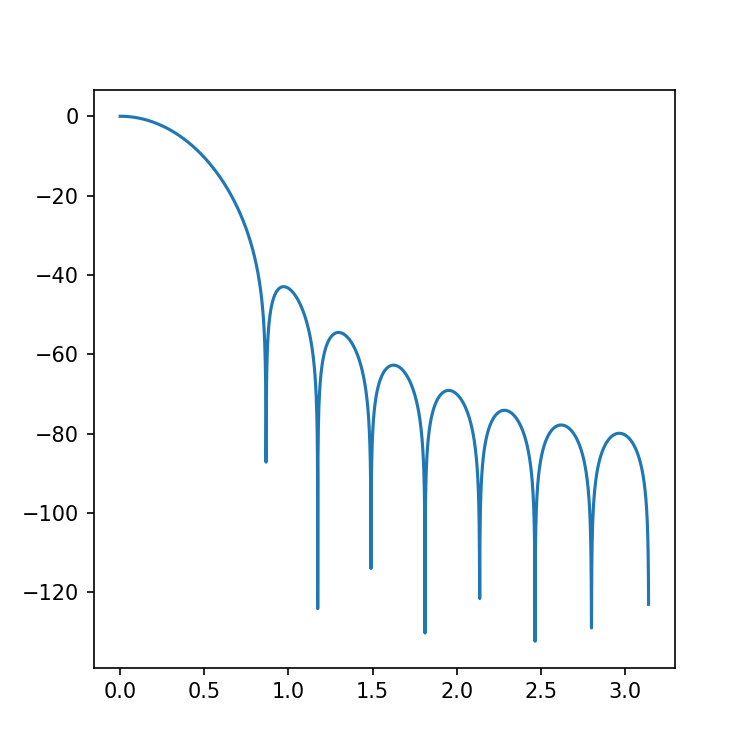

In [113]:
filt2 = sg.firwin(20, 0.10, window='hann', pass_zero='lowpass')
f,h = sg.freqz(filt2, worN=4000)
# plot_freq_response(f,h)
firfig = plt.figure(figsize=(5,5))
plt.plot(f,20 * np.log10(np.abs(h)))
plt.show()

## Data output testing

In [3]:
len(capture)

128

<IPython.core.display.Javascript object>


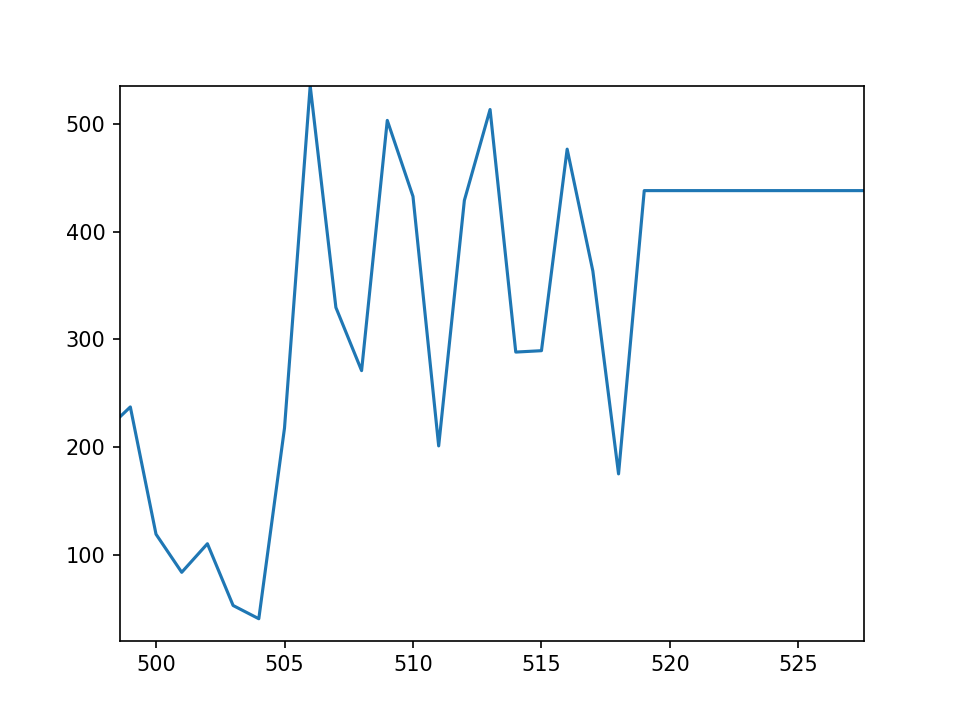

In [8]:
%matplotlib notebook
capture = np.genfromtxt('C:/Users/hansg/Desktop/putty.log', delimiter=",", dtype=np.int16)
fs = 100000
t = np.arange(0,len(capture)/fs,1/fs)
capture = capture[:-1:2] + 1j*capture[1::2]
plt.plot(np.abs(capture))

In [31]:
[print(np.binary_repr(capture[i])) for i in range(100)]

1111111111101010
11000
110
11111
11100
1101
11100
1111111111110000
101
1111111111011111
1111111111101010
1111111111100111
1111111111011111
1
1111111111101101
11001
1001
11110
11101
1010
11010
1111111111101110
10
1111111111011111
1111111111101000
1111111111101001
1111111111011111
100
1111111111101111
11011
1011
11101
11110
1000
11001
1111111111101100
0
1111111111011111
1111111111100110
1111111111101011
1111111111011111
110
1111111111110001
11100
1110
11100
11111
101
10111
1111111111101010
1111111111111101
1111111111011111
1111111111100100
1111111111101101
1111111111100000
1001
1111111111110100
11101
10000
11010
11111
10
10101
1111111111100111
1111111111111010
1111111111011111
1111111111100011
1111111111101111
1111111111100001
1011
1111111111110110
11101
10010
10111
11111
1111111111111111
10011
1111111111100101
1111111111110111
1111111111011111
1111111111100010
1111111111110010
1111111111100010
1110
1111111111111001
11111
10101
10111
11111
1111111111111100
10001
1111111111100100
11111111

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]